<a href="https://colab.research.google.com/github/Vishwa1030/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Loading the Dataset**

In [ ]:
Plants = pd.read_csv('/content/task3.csv')
print(Plants)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
print("Column Names")
print(Plants.columns)



Column Names
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### **Confirm that the target variable is categorical**

In [ ]:
print("Unique Values in Target Variable")
print(Plants['species'].unique())

Unique Values in Target Variable
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### **Data Quality Check**

In [ ]:
print("Data Quality Check")
print(Plants.info())

Data Quality Check
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### **Check for missing values**

In [ ]:
print("Missing Values")
print(Plants.isnull().sum())

Missing Values
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### **Check for outliers using a box plot**

 Outliers Check 


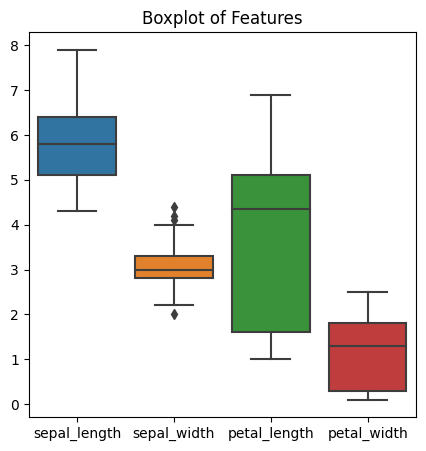

In [ ]:
print(" Outliers Check ")
plt.figure(figsize=(5, 5))
sns.boxplot(data=Plants.drop('species', axis=1))
plt.title('Boxplot of Features')
plt.show()

### **Data Exploration**

In [ ]:
print("Data Exploration")
print(Plants.describe())

Data Exploration
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### **Visualize the distribution of the target variable**

Distribution of Target Variable


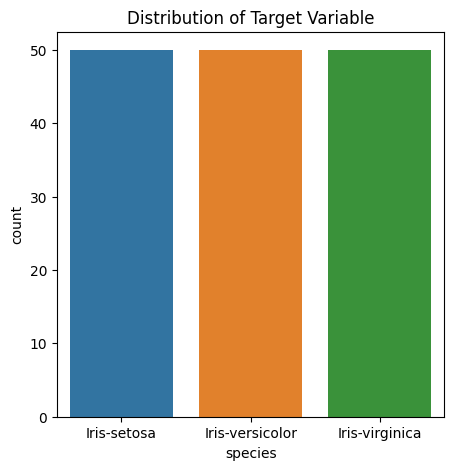

In [ ]:
print("Distribution of Target Variable")
plt.figure(figsize=(5, 5))
sns.countplot(x='species', data=Plants)
plt.title('Distribution of Target Variable')
plt.show()


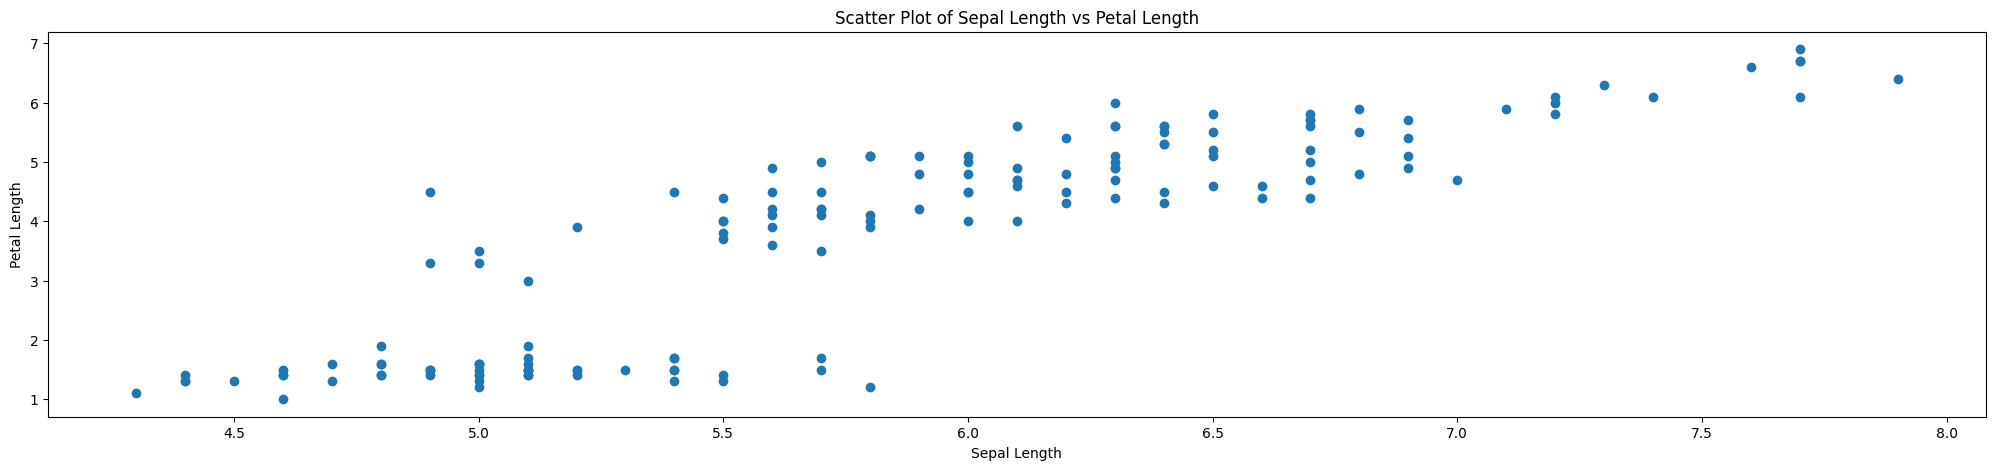

In [ ]:
plt.figure(figsize=(25, 5))
plt.scatter(Plants['sepal_length'], Plants['petal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.show()

### **Prepare the data for modeling**

In [ ]:
X = Plants.drop('species', axis=1)
y = Plants['species']

### **Split the dataset into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardize the features (scaling)**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Train a K-Nearest Neighbors (KNN) classifier**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Make predictions on the test set**

In [ ]:
y_pred = classifier.predict(X_test)

### **Evaluate the performance of the model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")